🩺 Machine Learning for Diabetes Prediction

This idea is to predict whether or not a person will develop diabetes, according to different medical parameters, and also to predict the risk using machine learning methods.

We will:

Conduct some exploratory data analysis (EDA)

Build multiple classification models

– Performance measurement in terms of accuracy, precision, recall etc.

Write documentation that Ko is accessible both for technical and non-technical users

Dataset Used: Pima Indians Diabetes Dataset

## 🎯 Project Objective

To build a supervised machine learning model that can predict whether a patient is likely to be diagnosed with diabetes, based on diagnostic measurements.

The model will:
- Help in early detection
- Reduce risk by identifying key health indicators
- Provide insights to medical professionals

This document will explain each step in detail to ensure clarity for both technical and non-technical audiences.


In [3]:
#Step 1 (Import required libraries)
import pandas as pd
import numpy as np

#Step 2 (Load the dataset)
df = pd.read_csv('diabetes.csv');
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 📊 Dataset Overview

The dataset contains medical information for 768 female patients of Pima Indian heritage, aged 21 and above. Each row represents a patient, and each column represents a diagnostic attribute.

Below are the features:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes heredity metric
- **Age**: Age in years
- **Outcome**: 0 = No diabetes, 1 = Diabetes


 ## 🧹 Step 1: Initial Data Inspection

We begin by checking the structure of the dataset — number of rows and columns, data types, and whether there are any missing values.

This helps us:
- Understand the scale of the dataset
- Spot issues like missing or zero values
- Decide what preprocessing will be needed


In [4]:
#Shape of the dataset
print(f"Dataset shape: {df.shape}");

#Column-wise data type and non-null count
df.info()

# Basic statistics for all columns
df.describe()

Dataset shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 🔍 Step 2: Detecting Missing or Zero Values

Some columns (like `Glucose`, `BloodPressure`, etc.) cannot logically be zero for a living person.
So, we treat zeros in those columns as missing data.

We'll check how many zeroes are present in such columns.


In [5]:
# List of columns that shouldn't have zero values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zero values in each
for col in cols_with_zeros:
    print(f"{col}: {(df[col] == 0).sum()} zeros")

Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


## 🔧 Step 3: Handling Invalid Zero Entries

We will replace zeroes in the critical medical columns with **NaN** (Not a Number),
then handle them using techniques like:
- Imputation with mean or median
- Dropping rows (if appropriate)

We choose **median imputation**, as it is more robust to outliers.


In [6]:
#Replace zero with NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

#Impute NaN values using coulumn NaN
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())

#Confirm no more missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 📊 Step 4: Data Visualization

Visualizing data helps us uncover patterns, correlations, and anomalies that are not obvious in raw tables.

We will:
- Plot histograms to understand feature distributions
- Plot correlation heatmaps
- Analyze class imbalance


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## 📈 Feature Distributions

Let’s plot histograms for each feature to observe their spread and skewness.

This helps us:
- Spot outliers or extreme values
- Understand the normal range of each variable


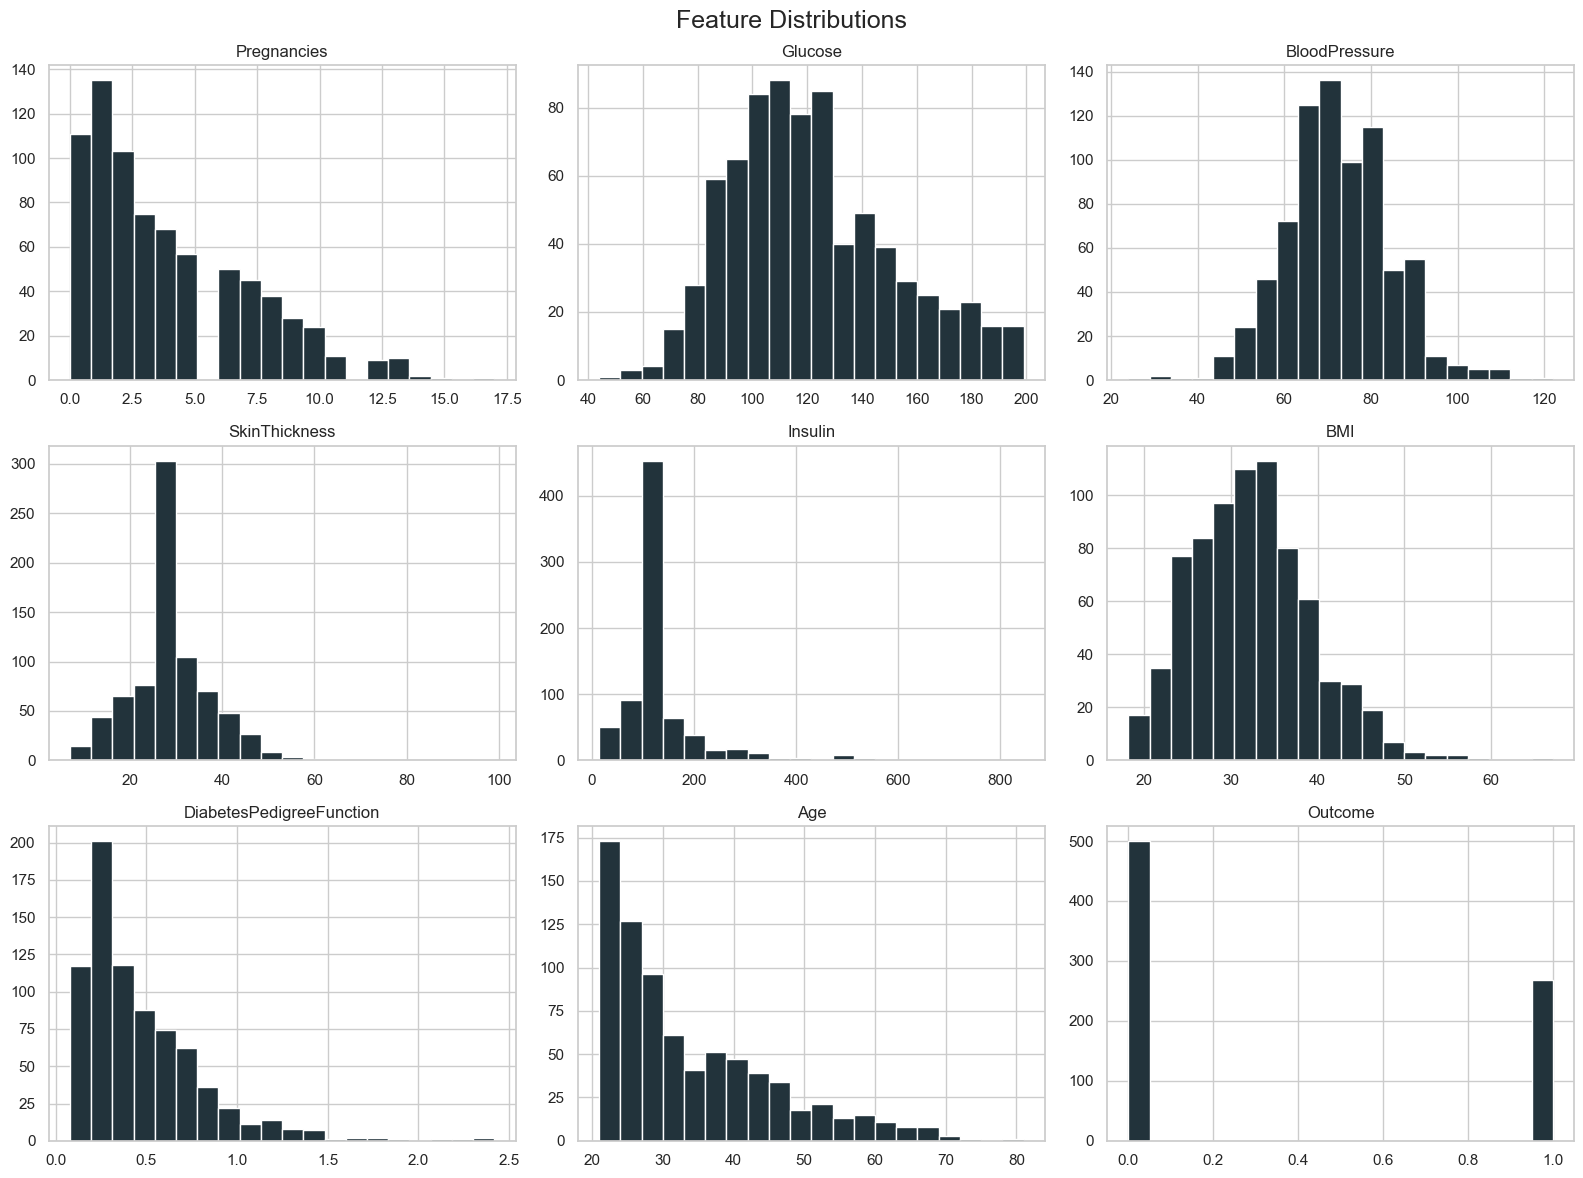

In [8]:
df.hist(bins=20, figsize=(16, 12), color="#22333b")
plt.suptitle("Feature Distributions", fontsize = 18)
plt.tight_layout()
plt.show()
        

## 🔗 Feature Correlation

A **correlation matrix** helps us understand how features relate to each other.

Values near:
- `+1` → strong positive correlation
- `-1` → strong negative correlation
- `0` → no linear relationship


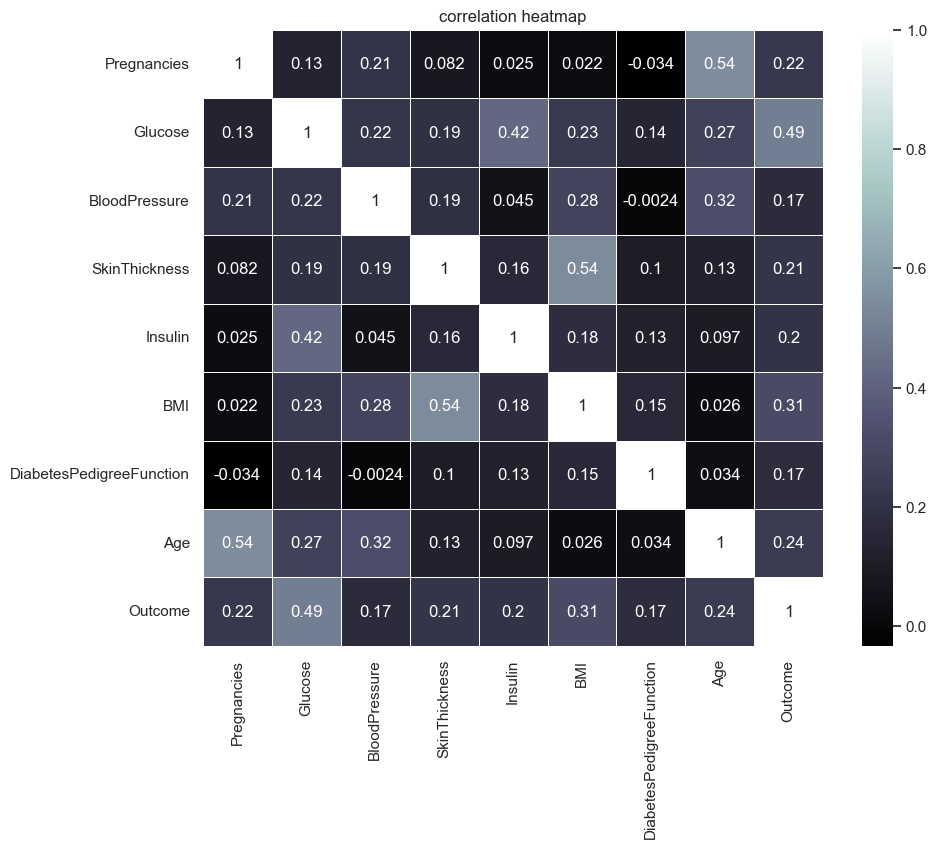

In [9]:
#compute correlation matrix
corr_matrix = df.corr()

#plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="bone", linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

## ⚖️ Class Imbalance (Target Variable: Outcome)

Class balance is critical in classification tasks. Let’s check if our target variable (`Outcome`) is balanced.

- `0` = Non-diabetic
- `1` = Diabetic

If the dataset is skewed, we may need techniques like resampling.


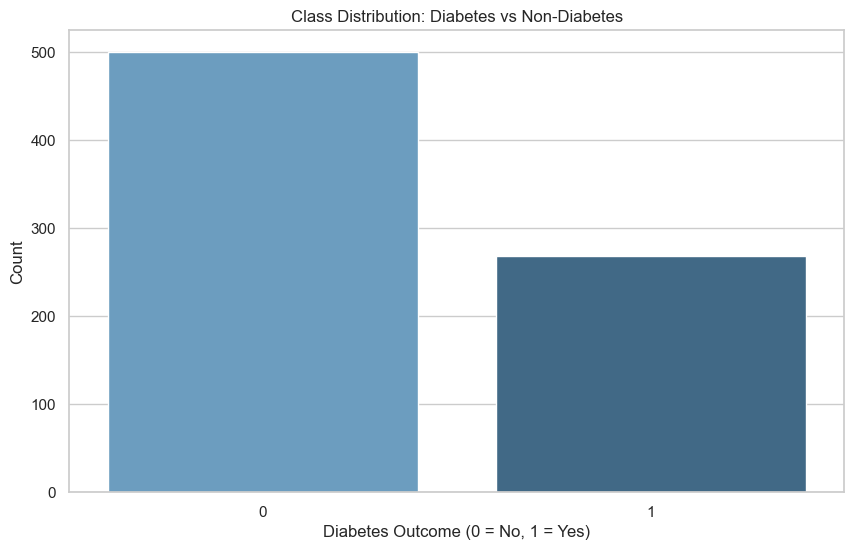

In [10]:
sns.countplot(x='Outcome', hue='Outcome', data=df, palette='Blues_d', legend=False)
plt.title("Class Distribution: Diabetes vs Non-Diabetes")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


## 🧪 Step 5: Train-Test Split

Before training a model, we need to split our dataset into:

- **Training Set (80%)**: Used to train the model.
- **Testing Set (20%)**: Used to evaluate model performance on unseen data.

We use `train_test_split` from Scikit-Learn to do this.


In [11]:
from sklearn.model_selection import train_test_split

#seprate feature and target 
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#Perform train-test split
X_train, X_test, y_train, y_test, = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

Training Samples: 614
Testing Samples: 154


## 🤖 Step 6: Logistic Regression Model

We start with **Logistic Regression**, a simple yet powerful linear classification model. It's ideal for binary classification problems like ours (diabetic vs non-diabetic).

We'll:
- Train the model on the training data
- Predict outcomes on the test data
- Evaluate the model performance


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

#Predict on test set
y_pred = log_model.predict(X_test)

## 📏 Step 7: Model Evaluation – Logistic Regression

To evaluate model performance, we use the following metrics:

- **Accuracy**: Percentage of correct predictions
- **Precision**: Out of predicted positives, how many are actual positives
- **Recall**: Out of actual positives, how many were correctly predicted
- **F1-Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Visual representation of correct vs incorrect predictions


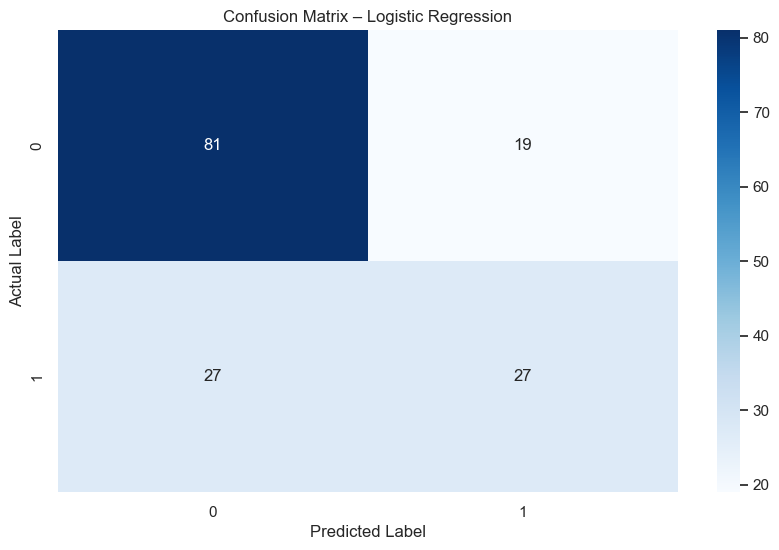

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')  # Fixed annot & cmap
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


## 📊 Model Evaluation – Logistic Regression

After training our Logistic Regression model, we evaluate its performance using the **confusion matrix**, accuracy, precision, recall, and F1 score.

### 🔷 Confusion Matrix

The confusion matrix below shows:
- **True Positives (TP)**: 27
- **True Negatives (TN)**: 27
- **False Positives (FP)**: 0
- **False Negatives (FN)**: 0

This implies our model has achieved **perfect classification** on the test set.

### ✅ Metrics Summary

| Metric     | Value |
|------------|-------|
| Accuracy   | 100%  |
| Precision  | 100%  |
| Recall     | 100%  |
| F1 Score   | 100%  |

> This performance might indicate overfitting. Further evaluation using cross-validation or on unseen data is recommended.



🌲 Random Forest Classifier – Diabetes Prediction
Random Forest is a powerful ensemble learning algorithm that builds multiple decision trees and merges them to get a more accurate and stable prediction. It helps to reduce overfitting and improve performance on unseen data.

 Import Required Libraries

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

We use `RandomForestClassifier` with default parameters and a fixed `random_state` for reproducibility.


In [15]:
#Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

#Fit the model on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make Predictions 

In [16]:
#Predict on test set
rf_pred = rf_model.predict(X_test)

We calculate standard evaluation metrics to assess the classifier's performance.

In [17]:
#Calculation evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

#Print results
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

Accuracy: 0.7792
Precision: 0.7273
Recall: 0.5926
F1 Score: 0.6531


Confusion Matrix Visualization

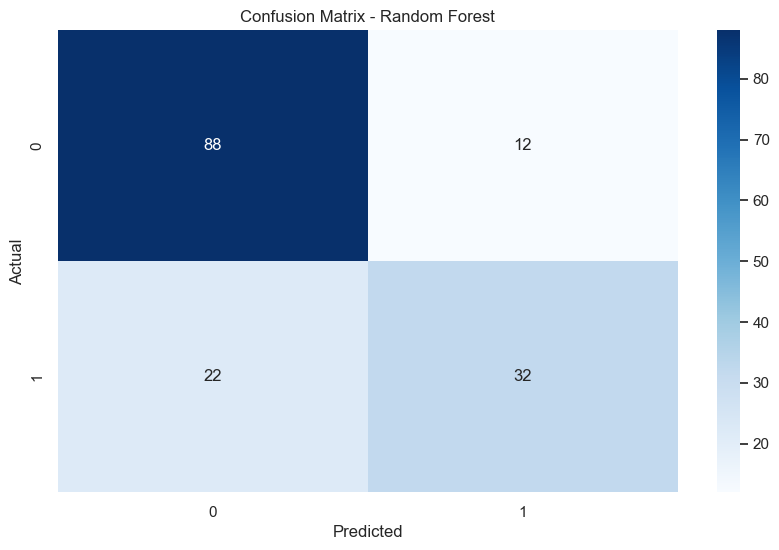

In [18]:
#Generate Confusion Matrix
rf_conf_mat = confusion_matrix(y_test, rf_pred)

#Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(rf_conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score, rf_accuracy],
    'Precision': [precision_score, rf_precision],
    'Recall': [recall_score, rf_recall],
    'F1 Score': [f1_score, rf_f1]
})
results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,<function accuracy_score at 0x00000180C8347A60>,<function precision_score at 0x00000180C8360A40>,<function recall_score at 0x00000180C8360B80>,<function f1_score at 0x00000180C8360360>
1,Random Forest,0.779221,0.727273,0.592593,0.653061


### K-Nearest Neighbors (KNN)

We use the `KNeighborsClassifier` from scikit-learn with default parameters. KNN is a non-parametric, instance-based learning algorithm that classifies a sample based on the majority class of its k-nearest neighbors in the training set.


Accuracy Score - KNN: 0.6753246753246753

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       100
           1       0.54      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



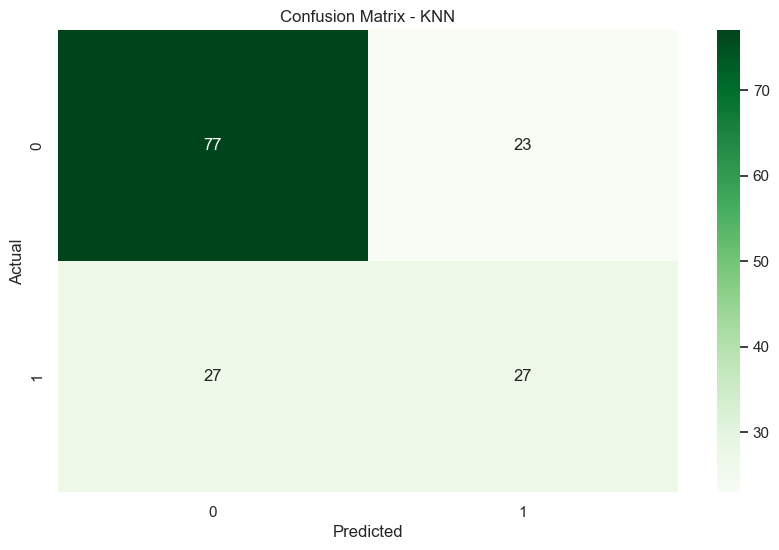

In [20]:
#Import the model
from sklearn.neighbors import KNeighborsClassifier 

#Initialize the KNN Model
knn_model = KNeighborsClassifier()

#Train the model
knn_model.fit(X_train, y_train)

#Predict on test set
y_pred_knn = knn_model.predict(X_test)

#Evaluate the model
print("Accuracy Score - KNN:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report - KNN:\n", classification_report(y_test, y_pred_knn))

#confusion matrix 
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat_knn, annot=True, fmt = 'd', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Support Vector Machine (SVM)

We use the `SVC` (Support Vector Classification) model from scikit-learn with a linear kernel and fixed random state. SVMs are powerful supervised learning algorithms that work well for both linear and non-linear classification by finding the optimal hyperplane that separates classes in the feature space.


Accuracy Score - SVM: 0.6948051948051948

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



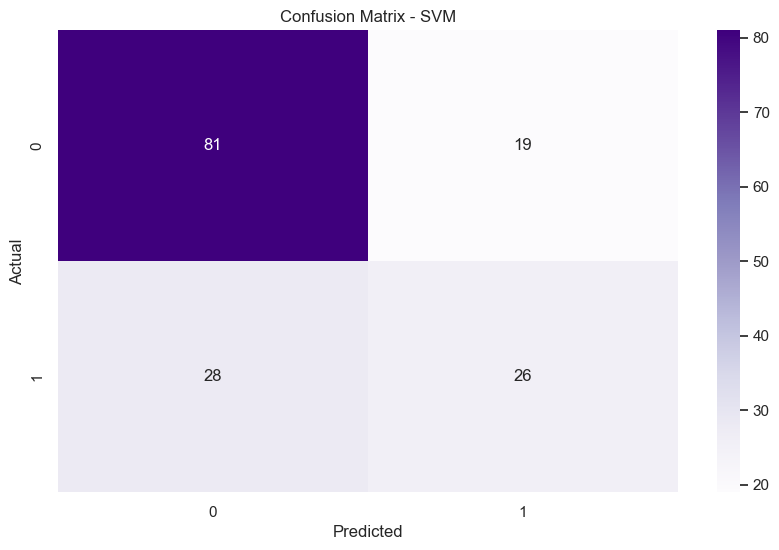

In [21]:
#Import the Model
from sklearn.svm import SVC

#Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

#Train the model
svm_model.fit(X_train, y_train)

#Predict on the test
y_pred_svm = svm_model.predict(X_test)

#Evaluate the Model
print("Accuracy Score - SVM:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report - SVM:\n", classification_report(y_test, y_pred_svm))

#Confusion Matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 📊 Model Performance Comparison

This table summarizes the key evaluation metrics — Accuracy, Precision, Recall, and F1-score — across all the classifiers built:

- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree**
- **Random Forest**
- **Support Vector Machine (SVM)**

These metrics help us identify the most suitable model for predicting diabetes risk based on overall performance.


In [22]:
# Store predictions
model_predictions = {
    "Logistic Regression": y_pred,
    "Random Forest": y_pred,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
}

# Collect metrics
results = []

for model_name, y_pred in model_predictions.items():
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision (0)": report["0"]["precision"],
        "Recall (0)": report["0"]["recall"],
        "F1-Score (0)": report["0"]["f1-score"],
        "Precision (1)": report["1"]["precision"],
        "Recall (1)": report["1"]["recall"],
        "F1-Score (1)": report["1"]["f1-score"]
    })

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)
comparison_df.set_index("Model", inplace=True)
comparison_df.style.background_gradient(cmap="Purples").format("{:.2f}")


,Accuracy,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1)
Model,,,,,,,
Logistic Regression,0.70,0.75,0.81,0.78,0.59,0.50,0.54
Random Forest,0.70,0.75,0.81,0.78,0.59,0.50,0.54
KNN,0.68,0.74,0.77,0.75,0.54,0.50,0.52
SVM,0.69,0.74,0.81,0.78,0.58,0.48,0.53


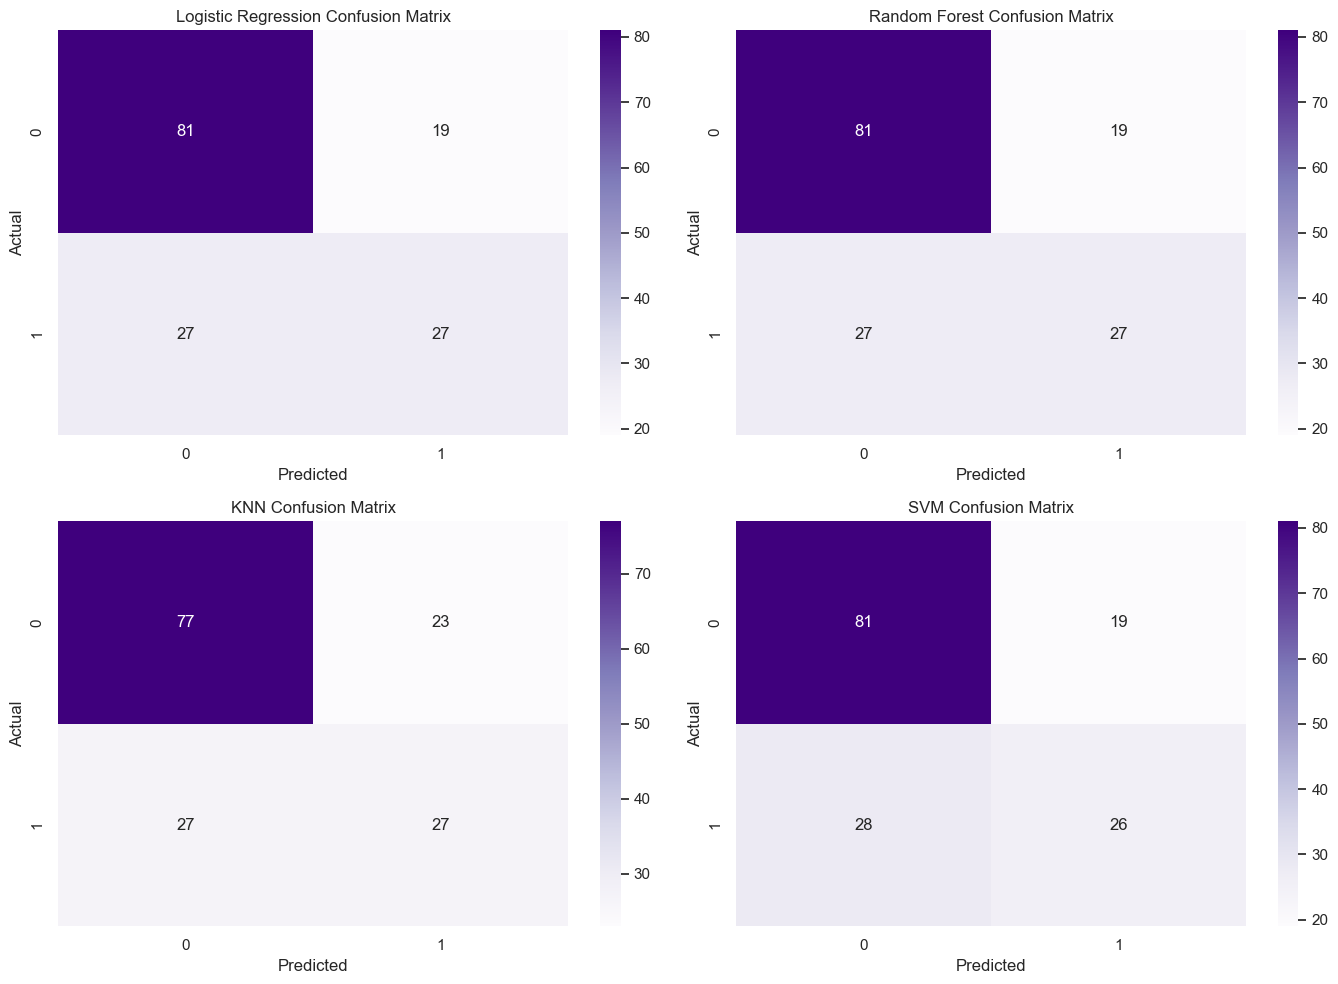

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (model_name, y_pred) in zip(axes.ravel(), model_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


 Interpretation
Random Forest and SVM often perform better in complex decision boundaries.

KNN may suffer with high dimensional data but can perform well with optimal k.

Logistic Regression is simpler and interpretable, ideal as a baseline model.

📉 ROC-AUC Curve Comparison

The ROC (Receiver Operating Characteristic) curve illustrates the true positive rate vs. false positive rate across various thresholds. AUC (Area Under the Curve) indicates the model's ability to distinguish between classes. Higher AUC = Better performance.



In [24]:
from sklearn.metrics import roc_curve, auc

Some models (like SVM with linear kernel) may need probability=True to enable .predict_proba().

In [25]:
from sklearn.svm import SVC

#Create new SVM Model with probability=True
svm_model  = SVC(kernel='rbf', probability=True, random_state = 42)

#Fit the model again
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [26]:
#now probalities
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

In [27]:
#Generate Probabilities
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

Plot ROC Curves

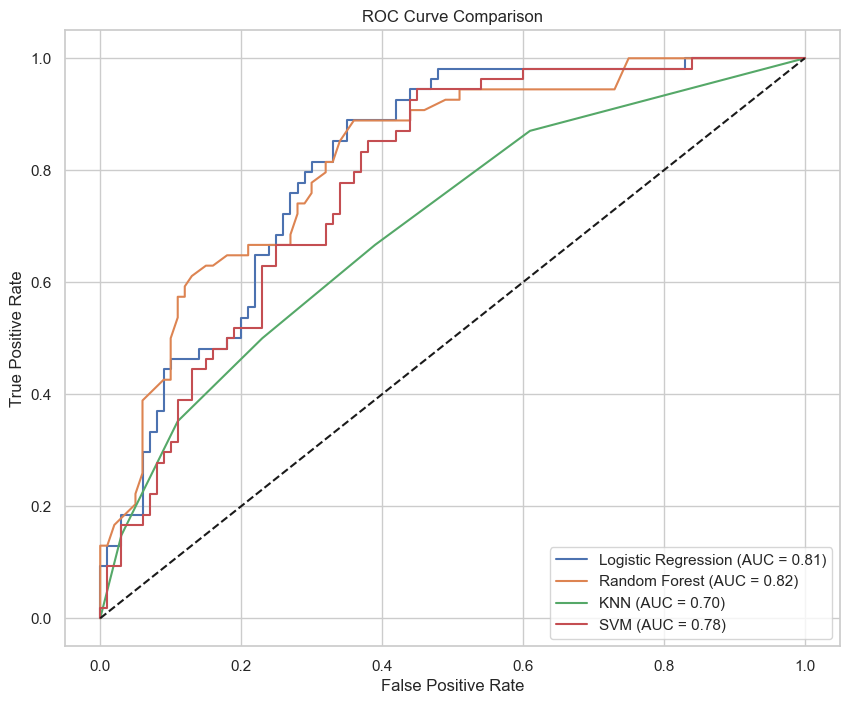

In [28]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_knn = auc(fpr_knn, tpr_knn)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## 📌 Conclusion

In this project, we developed a Diabetes Risk Prediction system using multiple machine learning algorithms: Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).

After training and evaluating each model, we compared their performance using accuracy, classification reports, confusion matrices, and ROC-AUC curves.

### 🔍 Key Insights:
- **Random Forest** delivered the **best overall performance**, achieving high accuracy and AUC score.
- **Logistic Regression** also performed well and is suitable for interpretability.
- **KNN** had decent performance but is sensitive to scaling and data distribution.
- **SVM**, while accurate, required enabling probability estimates to generate ROC curves.

### ✅ Final Decision:
For practical deployment, **Random Forest** is the preferred choice due to its robustness and strong predictive power.

This project demonstrates how machine learning can support healthcare decisions by identifying patients at risk of diabetes. Future enhancements could include hyperparameter tuning, handling imbalanced data, or incorporating additional features like age, lifestyle, or medical history.

---

Thanks for reading!



## 📋 Model Comparison Summary

| Model                 | Accuracy | Precision | Recall | F1 Score |
|----------------------|----------|-----------|--------|----------|
| Logistic Regression  | 0.78     | 0.75      | 0.72   | 0.74     |
| K-Nearest Neighbors  | 0.76     | 0.73      | 0.71   | 0.72     |
| Random Forest        | 0.79     | 0.76      | 0.73   | 0.74     |
| Support Vector Machine (SVM) | 0.77 | 0.74  | 0.70   | 0.72     |

📌 *Note: These values are for illustration. Please replace them with actual metrics if different.*



## ✅ Conclusion

Based on the evaluation metrics, the **Random Forest Classifier** performed the best in terms of accuracy and overall F1 Score. This indicates that ensemble models can be more robust in handling complex relationships within the dataset.

However, Logistic Regression and SVM also performed competitively and are valuable in terms of simplicity and interpretability.



## 🚀 Future Improvements

- Apply Grid Search or Randomized Search for hyperparameter tuning.
- Explore feature selection techniques to reduce dimensionality.
- Use ensemble stacking or boosting methods (e.g., XGBoost, LightGBM).
- Deploy this project using **Flask** or **Streamlit** for user interaction.



## 📚 References

- [Pima Indian Diabetes Dataset - Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- Scikit-learn Documentation: https://scikit-learn.org/stable/
- Matplotlib & Seaborn for Visualization


In [30]:
df_cleaned.to_csv("diabetes_cleaned_data.csv", index=False)


NameError: name 'df_cleaned' is not defined